In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_csv('./analysis/BTC.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [16]:
df = df.rename(index=str, columns={"votes_disliked": "dislike",
                              "votes_important": "important",
                              "votes_liked": "liked",
                              "votes_lol": "lol",
                              "votes_negative": "bearish",
                              "votes_positive": "bullish",
                              "votes_saved": "saved",
                              "votes_toxic": "toxic"})

In [32]:
df['user_sent_opinions'] = df['bearish'] + df['bullish']

df['bullishness'] = ((df['bullish'] / df['user_sent_opinions']) * 100)

df['bearishness'] = -((df['bearish'] / df['user_sent_opinions']) * 100)

In [33]:
df.head()

,date_time,dislike,important,liked,lol,bearish,bullish,saved,toxic,title_smog_score,...,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,is_nan,user_sent_opinions,bullishness,bearishness
0,2018-04-08 14:00:00,2.0,19.0,18.0,1.0,4.0,22.0,3.0,0.0,11.208143,...,0,0,1,0,0,0,0,26.0,84.615385,-15.384615
1,2018-04-09 08:00:00,0.0,15.5,14.5,1.0,2.0,24.0,3.0,0.0,8.841846,...,1,0,0,0,0,0,0,26.0,92.307692,-7.692308
2,2018-04-10 10:00:00,2.0,12.0,16.0,4.0,2.0,19.0,4.0,0.0,3.129100,...,0,0,0,0,1,0,0,21.0,90.476190,-9.523810
3,2018-04-10 11:00:00,0.0,5.0,6.0,0.0,0.0,7.0,3.0,0.0,11.208143,...,0,0,0,0,1,0,0,7.0,100.000000,-0.000000
4,2018-04-10 12:00:00,0.0,3.0,3.0,0.0,0.0,3.0,3.0,0.0,3.129100,...,0,0,0,0,1,0,0,3.0,100.000000,-0.000000


# Distribution of Bullish Vs Bearish Votes

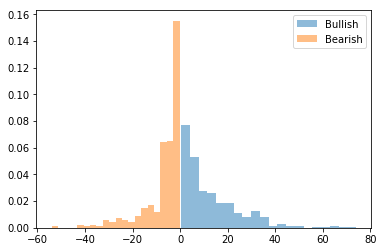

In [64]:
pyplot.hist(df[df['bullishness'] > 0] ['bullish'], bins=20, alpha=0.5, density=True, label='Bullish')
pyplot.hist(-df[df['bearishness'] < 0] ['bearish'], bins=20, alpha=0.5, density=True, label='Bearish')
#pyplot.hist(df['important'], bins=20, alpha=0.5, density=True, label='Important')
pyplot.legend()
pyplot.show()

# Distribution of Title Polarity and Subjectivity

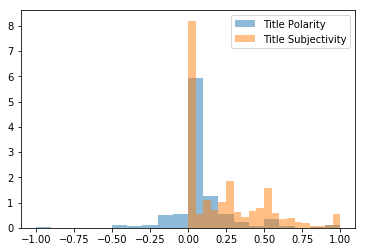

In [67]:
pyplot.hist(df['title_polarity'], bins=20, alpha=0.5, density=True, label='Title Polarity')
pyplot.hist(df['title_subjectivity'], bins=20, alpha=0.5, density=True, label='Title Subjectivity')

pyplot.legend()
pyplot.show()

# Distribution of Description Polarity and Subjectivity

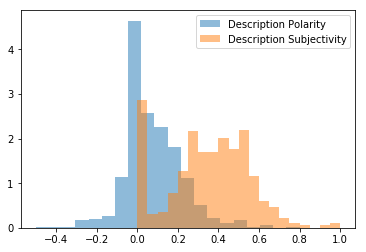

In [68]:
pyplot.hist(df['description_polarity'], bins=20, alpha=0.5, density=True, label='Description Polarity')
pyplot.hist(df['description_subjectivity'], bins=20, alpha=0.5, density=True, label='Description Subjectivity')

pyplot.legend()
pyplot.show()

# Title Subjectivity Vs Description Subjectivity

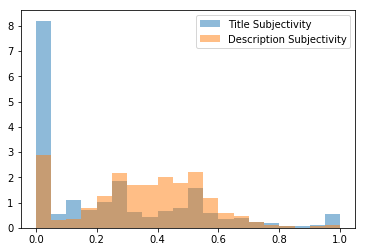

In [69]:
pyplot.hist(df['title_subjectivity'], bins=20, alpha=0.5, density=True, label='Title Subjectivity')
pyplot.hist(df['description_subjectivity'], bins=20, alpha=0.5, density=True, label='Description Subjectivity')

pyplot.legend()
pyplot.show()

# Title Polarity Vs Description Polarity

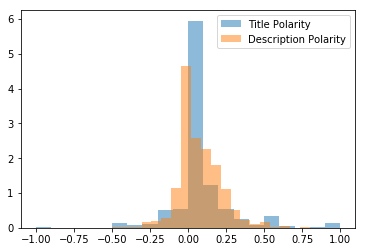

In [70]:
pyplot.hist(df['title_polarity'], bins=20, alpha=0.5, density=True, label='Title Polarity')
pyplot.hist(df['description_polarity'], bins=20, alpha=0.5, density=True, label='Description Polarity')

pyplot.legend()
pyplot.show()

## Title Subjectivity on Bullish and Bearish Votes 

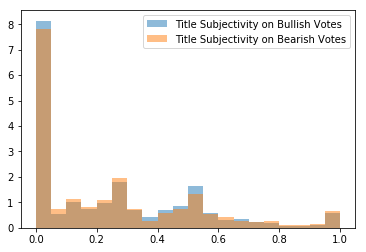

In [50]:
pyplot.hist(df[df['bullishness'] > 0] ['title_subjectivity'], bins=20, alpha=0.5, density=True, label='Title Subjectivity on Bullish Votes')
pyplot.hist(df[df['bearishness'] < 0] ['title_subjectivity'], bins=20, alpha=0.5, density=True, label='Title Subjectivity on Bearish Votes')
pyplot.legend()
pyplot.show()

## Title Polarity on Bullish and Bearish Votes 

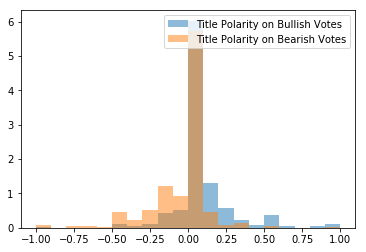

In [72]:
pyplot.hist(df[df['bullishness'] > 0] ['title_polarity'], bins=20, alpha=0.5, density=True, label='Title Polarity on Bullish Votes')
pyplot.hist(-df[df['bearishness'] < 0] ['title_polarity'], bins=20, alpha=0.5, density=True, label='Title Polarity on Bearish Votes')
pyplot.legend()
pyplot.show()

## Description Polarity on Bullish and Bearish Votes

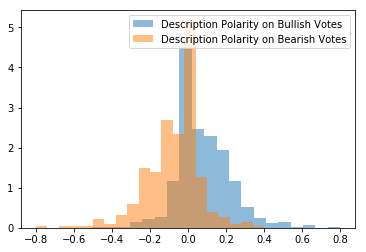

In [73]:
pyplot.hist(df[df['bullishness'] > 0] ['description_polarity'], bins=20, alpha=0.5, density=True, label='Description Polarity on Bullish Votes')
pyplot.hist(-df[df['bearishness'] < 0] ['description_polarity'], bins=20, alpha=0.5, density=True, label='Description Polarity on Bearish Votes')
pyplot.legend()
pyplot.show()

## Description Subjectivity on Bullish and Bearish Votes

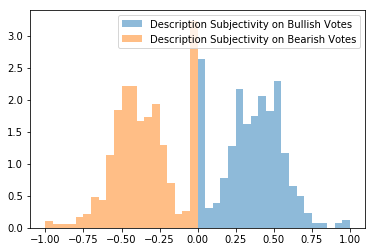

In [74]:
pyplot.hist(df[df['bullishness'] > 0] ['description_subjectivity'], bins=20, alpha=0.5, density=True, label='Description Subjectivity on Bullish Votes')
pyplot.hist(-df[df['bearishness'] < 0] ['description_subjectivity'], bins=20, alpha=0.5, density=True, label='Description Subjectivity on Bearish Votes')
pyplot.legend()
pyplot.show()

## User Generated Bullish Vs Bearish Votes

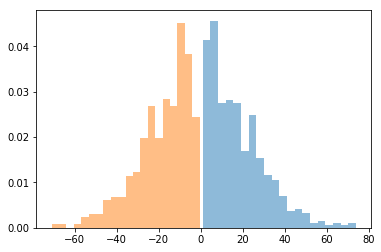

In [75]:
pyplot.hist(df[df['bullishness'] > 0] ['user_sent_opinions'], bins=20, alpha=0.5, density=True, label='Bullish Votes')
pyplot.hist(-df[df['bearishness'] < 0] ['user_sent_opinions'], bins=20, alpha=0.5, density=True, label='Bearish Votes')
pyplot.show()